In [1]:
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/Python-All-Sessions/roipoly.py
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/Python-All-Sessions/clock.jpg
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/Python-All-Sessions/aolme2.py

--2021-08-12 23:38:15--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/Python-All-Sessions/roipoly.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5372 (5.2K) [text/plain]
Saving to: ‘roipoly.py.3’

roipoly.py.3        100%[===================>]   5.25K  --.-KB/s    in 0s      

2021-08-12 23:38:15 (60.4 MB/s) - ‘roipoly.py.3’ saved [5372/5372]

--2021-08-12 23:38:16--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/Python-All-Sessions/clock.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72292 (71K) 

Row =257, Column =255


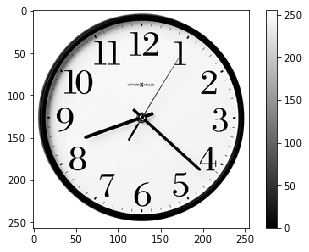

In [2]:
import sys
import numpy as np
import pylab as pl
import cv2
from roipoly import roipoly 
import pickle 
import aolme2 # Load the library


# import image to convert into ROI
imgName = 'clock.jpg'   

objectImage=cv2.imread(imgName)
img = cv2.cvtColor(objectImage, cv2.COLOR_RGB2GRAY )

# show the image
pl.figure()
pl.imshow(img, interpolation='nearest', cmap="gray")
pl.colorbar()

# extract rectangular boundary region of the irregular region
(row, col) = img.shape
print("Row ={}, Column ={}".format(row, col))


In [3]:
#@title Select ROI
import ipywidgets as widgets
min_row = widgets.IntSlider(description='MinRow:', value=0, max=row-1)
max_row = widgets.IntSlider(description='MaxRow:', value=150, max=row-1)
min_col = widgets.IntSlider(description='MinCol:', value=0, max=col-1)
max_col = widgets.IntSlider(description='MaxCol:', value=100, max=col-1)
display(min_row, max_row, min_col, max_col)








IntSlider(value=0, description='MinRow:', max=256)

IntSlider(value=150, description='MaxRow:', max=256)

IntSlider(value=0, description='MinCol:', max=254)

IntSlider(value=100, description='MaxCol:', max=254)

Wrote clock sprite in pickle file 

set_sprite(sprite_name=clock)
Reading file =  clock.pickle
(257, 255)
(50, 41)
50 41


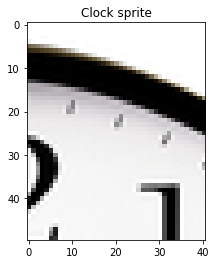

In [9]:
#@title Output
# extract rectangular boundary region of the irregular region
r_start = min_row.value
r_end   = max_row.value
c_start = min_col.value
c_end   = max_col.value
r       = [r_start, c_start, r_end, c_end]

ret,maskBool = cv2.threshold(img,-10,255,cv2.THRESH_BINARY)
b  = maskBool.astype(int)*255
roiMask=b.astype(np.uint8)

# Extract the sprite name without the extension of the image
SpriteName = str(imgName.rsplit(".")[0])

# Generate a single list with all the information needed in AOLME2 library
SpriteInfo = [SpriteName,objectImage,roiMask,r ]



# Store in a pickle file to be retrieved by AOLME2 library
with open('{}.pickle'.format(SpriteName), 'wb') as f:
            pickle.dump(SpriteInfo, f, pickle.HIGHEST_PROTOCOL)

print("Wrote {} sprite in pickle file \n".format(SpriteName))

my_sprite = aolme2.spr()       # Constructor
my_sprite.set_sprite("clock")  # Method: load file
my_sprite.show('Clock sprite') # Method: show()
